<a href="https://colab.research.google.com/github/NP-15/Deep-Learning/blob/main/Lab-01%3A%20Binary%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Lab-1
### Binary Classification

#### Original

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [74]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier manipulation
data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = y

# Only keep classes 0 (Setosa) and 1 (Versicolor)
data = data[data['target'] != 2]

# Display the first few rows of the dataset
print(data.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         100.000000        100.000000         100.000000   
mean            5.471000          3.099000           2.861000   
std             0.641698          0.478739           1.449549   
min             4.300000          2.000000           1.000000   
25%             5.000000          2.800000           1.500000   
50%             5.400000          3.050000           2.450000   
75%             5.900000          3.400000           4.325000   
max             7.000000          4.400000           5.100000   

       petal width (cm)      target  
count        100.000000  100.000000  
mean           0.786000    0.500000  
std            0.565153    0.502519  
min            0.100000    0.000000  
25%            0.200000    0.000000  
50%            0.800000    0.500000  
75%            1.300000    1.000000  
max            1.800000    1.000000  
target
0    50
1    50
Name: count, dtype: int64


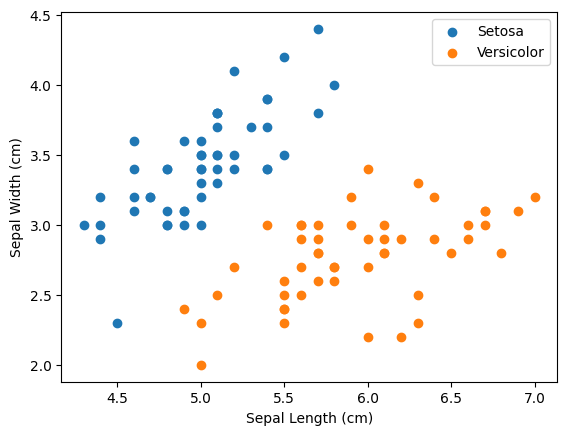

In [75]:
# Summary statistics
print(data.describe())

# Class distribution
print(data['target'].value_counts())

# Visualize the data
plt.scatter(data[data['target'] == 0]['sepal length (cm)'],
data[data['target'] == 0]['sepal width (cm)'], label='Setosa')
plt.scatter(data[data['target'] == 1]['sepal length (cm)'],
data[data['target'] == 1]['sepal width (cm)'], label='Versicolor')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


In [76]:
# Display the model coefficients
X = data.iloc[:,[0,1]]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
perceptron = Perceptron(max_iter=40, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

In [78]:
# Exercise 2: DIfferent hyperparameter values
perceptron2 = Perceptron(max_iter=10, eta0=0.2, random_state=42)
perceptron2.fit(X_train, y_train)

# Make predictions
y_pred2 = perceptron2.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:


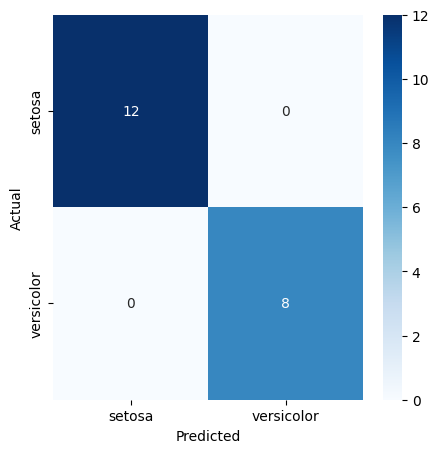

In [79]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names[:2], yticklabels=iris.target_names[:2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model Coefficients: [[ 0.56214556 -0.35288568]]
Model Intercept: [0.2]


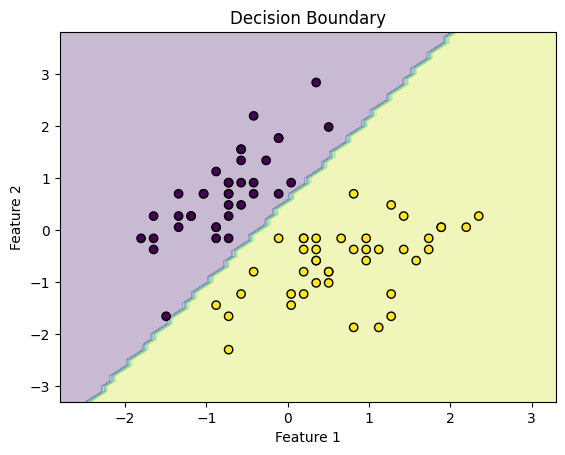

In [80]:
print("Model Coefficients:", perceptron.coef_)
print("Model Intercept:", perceptron.intercept_)

# Visualize decision boundary (only for the first two features)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()


#### Exercise-1: Using different features

In [81]:
 # Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier manipulation
data = pd.DataFrame(X, columns=iris.feature_names)
data = data.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 'columns')
data['target'] = y

# Only keep classes 0 (Setosa) and 1 (Versicolor)
data = data[data['target'] != 2]

# Display the first few rows of the dataset
print(data.head())

   petal length (cm)  petal width (cm)  target
0                1.4               0.2       0
1                1.4               0.2       0
2                1.3               0.2       0
3                1.5               0.2       0
4                1.4               0.2       0


In [82]:
# Display the model coefficients
X = data.iloc[:,[0,1]]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
# Initialize and train the Perceptron model
perceptron3 = Perceptron(max_iter=40, eta0=0.1, random_state=42)
perceptron3.fit(X_train, y_train)

# Make predictions
y_pred3 = perceptron3.predict(X_test)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:


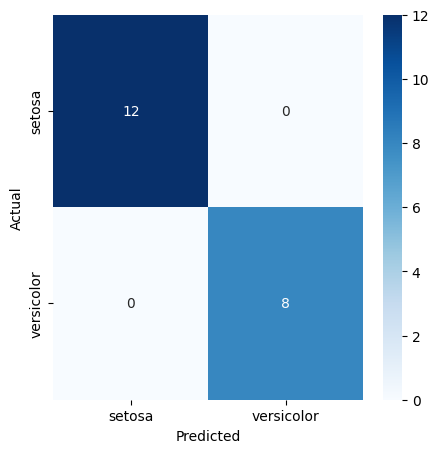

In [84]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Classification Report:")
print(classification_report(y_test, y_pred3))
print("Confusion Matrix:")

cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names[:2], yticklabels=iris.target_names[:2])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model Coefficients: [[ 0.56214556 -0.35288568]]
Model Intercept: [0.2]


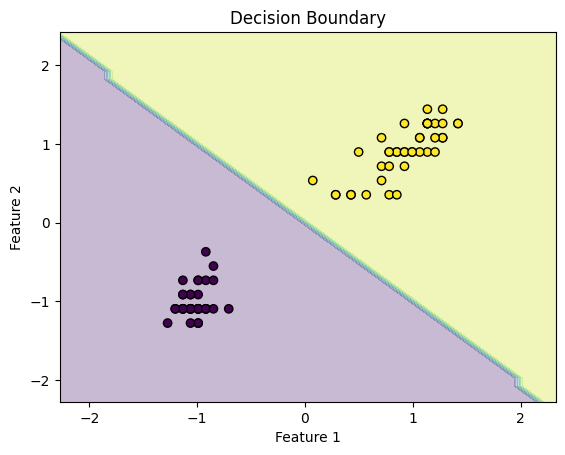

In [85]:
print("Model Coefficients:", perceptron.coef_)
print("Model Intercept:", perceptron.intercept_)

# Visualize decision boundary (only for the first two features)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = perceptron3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

#### Exercise 2: Different Hyperparameter values

In [86]:
# Make predictions
y_pred = perceptron2.predict(X_test)

Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.57      1.00      0.73         8

    accuracy                           0.70        20
   macro avg       0.79      0.75      0.70        20
weighted avg       0.83      0.70      0.69        20

Confusion Matrix:


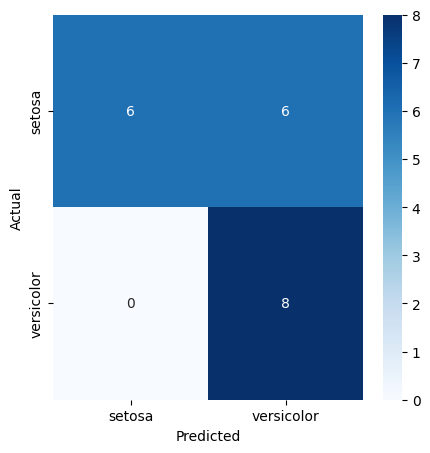

In [87]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names[:2], yticklabels=iris.target_names[:2])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Multi-Layer Perceptron

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

!pip install ucimlrepo

In [89]:
# Load the Breast Cancer Wisconsin dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [90]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=cancer.feature_names)
df['target'] = y

# Calculate mean features
df['mean radius'] = df[['mean radius', 'radius error', 'worst radius']].mean(axis=1)
df['mean texture'] = df[['mean texture', 'texture error', 'worst texture']].mean(axis=1)
df['mean perimeter'] = df[['mean perimeter', 'perimeter error', 'worst perimeter']].mean(axis=1)
df['mean area'] = df[['mean area', 'area error', 'worst area']].mean(axis=1)
df['mean smoothness'] = df[['mean smoothness', 'smoothness error', 'worst smoothness']].mean(axis=1)


# Keep only the specified columns
df = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']]

# Display the first few rows of the dataset
print(df.head())

   mean radius  mean texture  mean perimeter    mean area  mean smoothness  \
0    14.821667      9.538433      105.329667  1057.800000         0.095666   
1    15.367833     13.971300       98.366000  1118.693333         0.071255   
2    14.668533     15.855633       95.695000  1002.010000         0.086717   
3     8.941867     16.012000       59.965000   327.010000         0.120470   
4    14.529067     10.597100       97.579333   988.813333         0.083063   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     10.267218     15.394575       67.365435   525.269770   
std       2.830934      3.486592       19.647999   316.599021   
min       5.045033      7.378800       31.917667   112.844333   
25%       8.354500     12.754333       54.030333   319.813333   
50%       9.567567     15.175000       62.294333   422.976667   
75%      11.692433     17.540767       77.393000   627.163333   
max      22.002333     28.335367      152.250000  2432.400000   

       mean smoothness      target  
count       569.000000  569.000000  
mean          0.078590    0.627417  
std           0.012095    0.483918  
min           0.047461    0.000000  
25%           0.070515    0.000000  
50%           0.078969    1.000000  
75%           0.085913    1.000000  
max           0.121241    1.000000  
target
1    357
0    212
Name: count, dtype: int64


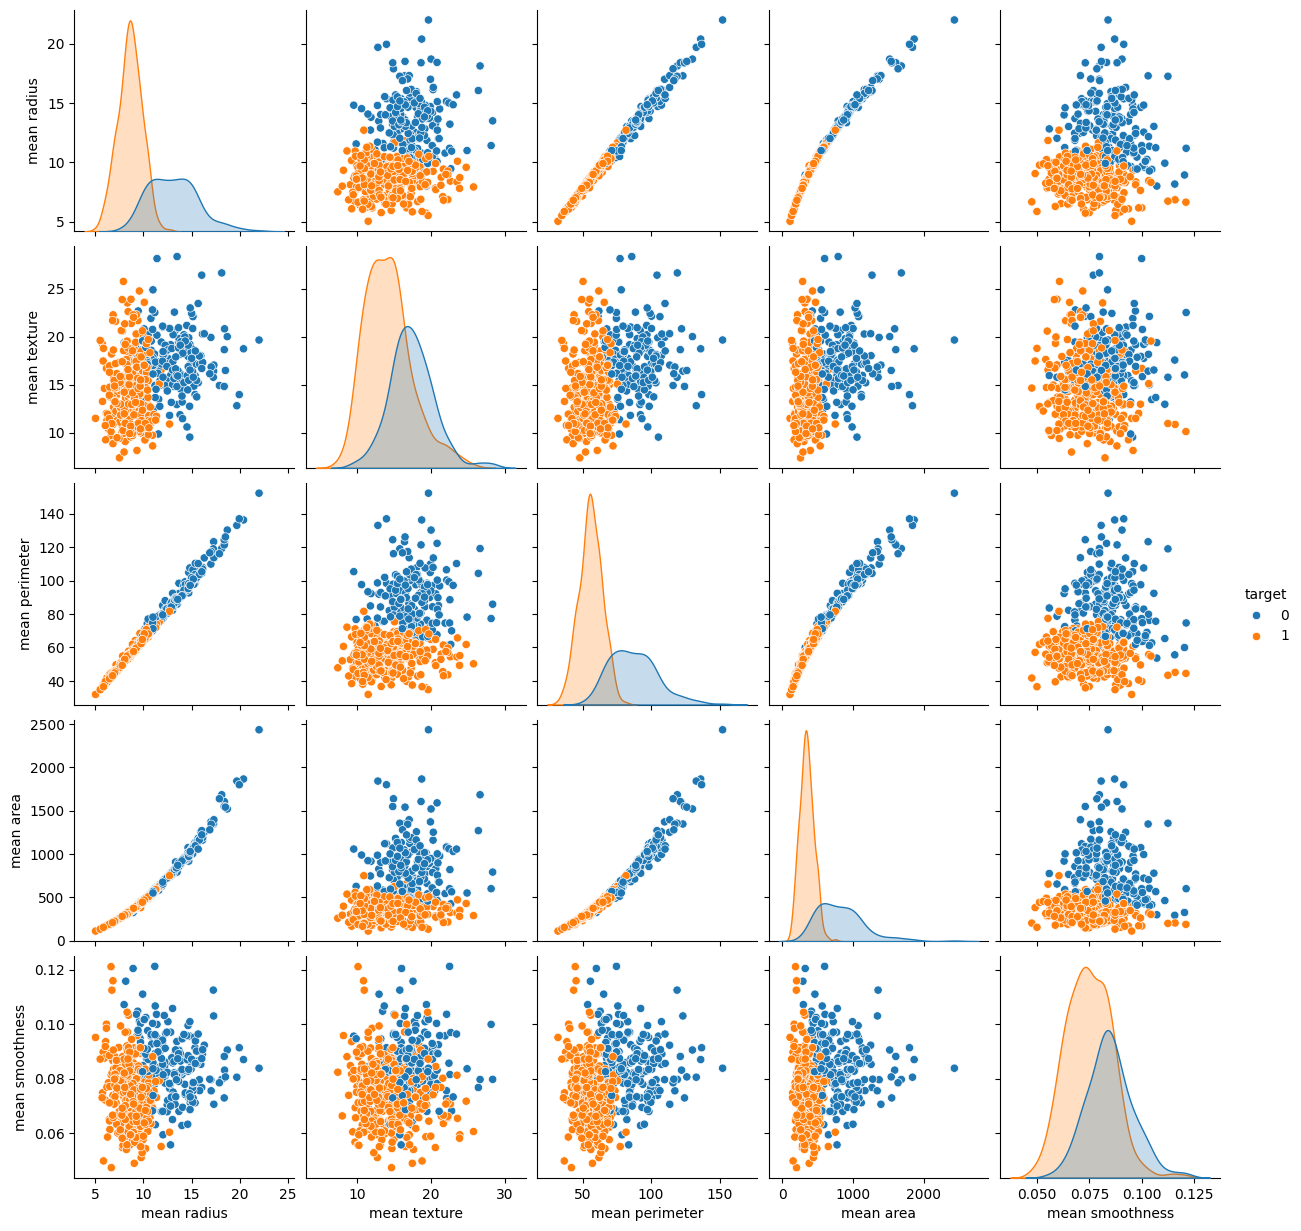

In [91]:
# Summary statistics
print(df.describe())
# Class distribution
print(df['target'].value_counts())
# Visualize pairplot for first few features
sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']], hue='target')
plt.show()

In [92]:
# Split the data into features and target variable
X = df.drop('target', axis=1).values
y = df['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
# Initialize and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=0.0001, solver='adam', random_state=42, verbose=True)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

Iteration 1, loss = 0.81366234
Iteration 2, loss = 0.77016659
Iteration 3, loss = 0.72962758
Iteration 4, loss = 0.69130206
Iteration 5, loss = 0.65511233
Iteration 6, loss = 0.62189163
Iteration 7, loss = 0.59108093
Iteration 8, loss = 0.56141905
Iteration 9, loss = 0.53421102
Iteration 10, loss = 0.50854303
Iteration 11, loss = 0.48440554
Iteration 12, loss = 0.46156582
Iteration 13, loss = 0.44039098
Iteration 14, loss = 0.42040250
Iteration 15, loss = 0.40132947
Iteration 16, loss = 0.38376941
Iteration 17, loss = 0.36706778
Iteration 18, loss = 0.35089278
Iteration 19, loss = 0.33610411
Iteration 20, loss = 0.32185774
Iteration 21, loss = 0.30849301
Iteration 22, loss = 0.29599393
Iteration 23, loss = 0.28402140
Iteration 24, loss = 0.27311721
Iteration 25, loss = 0.26247633
Iteration 26, loss = 0.25263000
Iteration 27, loss = 0.24358686
Iteration 28, loss = 0.23473965
Iteration 29, loss = 0.22660174
Iteration 30, loss = 0.21886392
Iteration 31, loss = 0.21175807
Iteration 32, los

Accuracy: 0.9824561403508771
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:


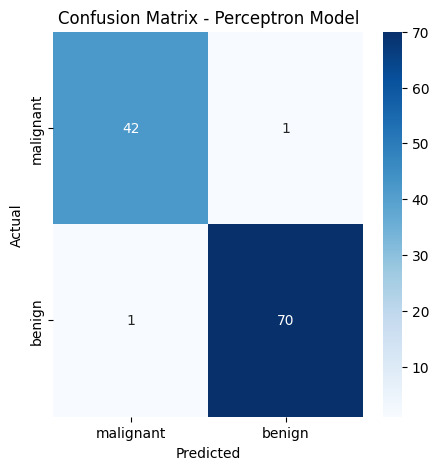

In [94]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Perceptron Model")
plt.show()

### Exercise-1: Different hidden layers and neurons per layer

In [95]:
# Initialize and train the MLP model
mlp2 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, alpha=0.0001, solver='adam', random_state=42, verbose=True)
mlp2.fit(X_train, y_train)

# Make predictions
y_pred2 = mlp2.predict(X_test)

Iteration 1, loss = 0.56874068
Iteration 2, loss = 0.54602723
Iteration 3, loss = 0.52437609
Iteration 4, loss = 0.50400881
Iteration 5, loss = 0.48428520
Iteration 6, loss = 0.46573278
Iteration 7, loss = 0.44828239
Iteration 8, loss = 0.43143997
Iteration 9, loss = 0.41568504
Iteration 10, loss = 0.40083602
Iteration 11, loss = 0.38657520
Iteration 12, loss = 0.37309710
Iteration 13, loss = 0.36022214
Iteration 14, loss = 0.34817804
Iteration 15, loss = 0.33675619
Iteration 16, loss = 0.32571607
Iteration 17, loss = 0.31553529
Iteration 18, loss = 0.30571363
Iteration 19, loss = 0.29642774
Iteration 20, loss = 0.28758421
Iteration 21, loss = 0.27931399
Iteration 22, loss = 0.27138262
Iteration 23, loss = 0.26390698
Iteration 24, loss = 0.25673495
Iteration 25, loss = 0.25000287
Iteration 26, loss = 0.24340657
Iteration 27, loss = 0.23721359
Iteration 28, loss = 0.23129417
Iteration 29, loss = 0.22588703
Iteration 30, loss = 0.22051889
Iteration 31, loss = 0.21541473
Iteration 32, los

Accuracy: 0.9824561403508771
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:


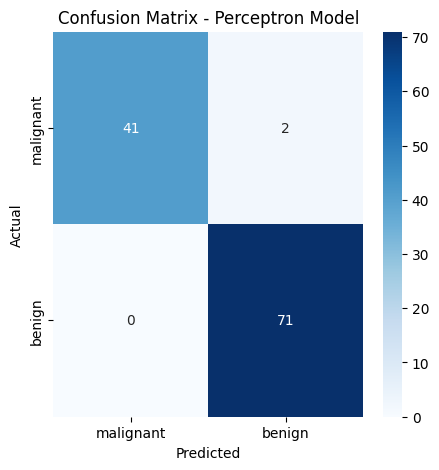

In [96]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:")
print(classification_report(y_test, y_pred2))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Perceptron Model")
plt.show()

In [97]:
# Initialize and train the MLP model
mlp3 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, alpha=0.0001, solver='adam', random_state=42, verbose=True)
mlp3.fit(X_train, y_train)

# Make predictions
y_pred3 = mlp3.predict(X_test)

Iteration 1, loss = 0.72938433
Iteration 2, loss = 0.65441398
Iteration 3, loss = 0.58691536
Iteration 4, loss = 0.52670551
Iteration 5, loss = 0.47121721
Iteration 6, loss = 0.42049016
Iteration 7, loss = 0.37512905
Iteration 8, loss = 0.33395832
Iteration 9, loss = 0.29756480
Iteration 10, loss = 0.26653014
Iteration 11, loss = 0.23918018
Iteration 12, loss = 0.21633269
Iteration 13, loss = 0.19701232
Iteration 14, loss = 0.18095218
Iteration 15, loss = 0.16756110
Iteration 16, loss = 0.15612462
Iteration 17, loss = 0.14711387
Iteration 18, loss = 0.13886398
Iteration 19, loss = 0.13248369
Iteration 20, loss = 0.12688408
Iteration 21, loss = 0.12219595
Iteration 22, loss = 0.11801367
Iteration 23, loss = 0.11490075
Iteration 24, loss = 0.11191990
Iteration 25, loss = 0.10942316
Iteration 26, loss = 0.10712231
Iteration 27, loss = 0.10534926
Iteration 28, loss = 0.10356312
Iteration 29, loss = 0.10204584
Iteration 30, loss = 0.10076024
Iteration 31, loss = 0.09927974
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9824561403508771
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:


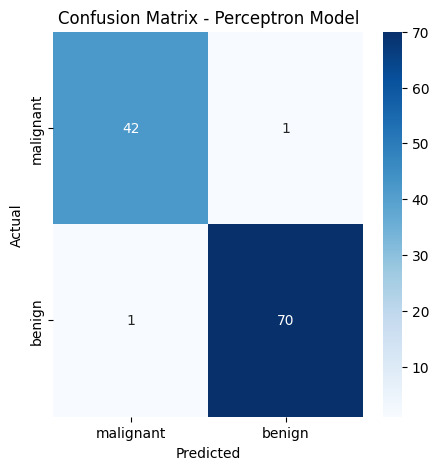

In [98]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Classification Report:")
print(classification_report(y_test, y_pred3))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Perceptron Model")
plt.show()

In [99]:
# Initialize and train the MLP model
mlp4 = MLPClassifier(hidden_layer_sizes=(50, 25, 10), max_iter=300, alpha=0.0001, solver='adam', random_state=42, verbose=True)
mlp4.fit(X_train, y_train)

# Make predictions
y_pred4 = mlp4.predict(X_test)

Iteration 1, loss = 0.82486570
Iteration 2, loss = 0.79888950
Iteration 3, loss = 0.77463768
Iteration 4, loss = 0.75238751
Iteration 5, loss = 0.73306126
Iteration 6, loss = 0.71539071
Iteration 7, loss = 0.69836799
Iteration 8, loss = 0.68072925
Iteration 9, loss = 0.66304322
Iteration 10, loss = 0.64426832
Iteration 11, loss = 0.62424040
Iteration 12, loss = 0.60161795
Iteration 13, loss = 0.57544213
Iteration 14, loss = 0.54493249
Iteration 15, loss = 0.51148324
Iteration 16, loss = 0.47612156
Iteration 17, loss = 0.44240795
Iteration 18, loss = 0.41109370
Iteration 19, loss = 0.38048393
Iteration 20, loss = 0.35191630
Iteration 21, loss = 0.32455006
Iteration 22, loss = 0.29932523
Iteration 23, loss = 0.27538550
Iteration 24, loss = 0.25325705
Iteration 25, loss = 0.23222440
Iteration 26, loss = 0.21218178
Iteration 27, loss = 0.19384364
Iteration 28, loss = 0.17715836
Iteration 29, loss = 0.16354853
Iteration 30, loss = 0.15262657
Iteration 31, loss = 0.14309928
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9912280701754386
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Confusion Matrix:


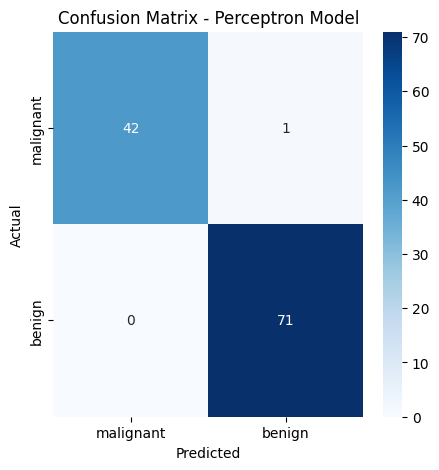

In [100]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred4))
print("Classification Report:")
print(classification_report(y_test, y_pred4))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Perceptron Model")
plt.show()

### Exercise 2 - Adjusting alpha values

In [101]:
# Initialize and train the MLP model
mlp5 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=0.1, solver='adam', random_state=42, verbose=True)
mlp5.fit(X_train, y_train)

# Make predictions
y_pred5 = mlp5.predict(X_test)

Iteration 1, loss = 0.81759825
Iteration 2, loss = 0.77409192
Iteration 3, loss = 0.73354970
Iteration 4, loss = 0.69522427
Iteration 5, loss = 0.65903869
Iteration 6, loss = 0.62582923
Iteration 7, loss = 0.59503814
Iteration 8, loss = 0.56540101
Iteration 9, loss = 0.53822621
Iteration 10, loss = 0.51259417
Iteration 11, loss = 0.48849649
Iteration 12, loss = 0.46569970
Iteration 13, loss = 0.44457181
Iteration 14, loss = 0.42463524
Iteration 15, loss = 0.40561975
Iteration 16, loss = 0.38812164
Iteration 17, loss = 0.37148081
Iteration 18, loss = 0.35536951
Iteration 19, loss = 0.34064913
Iteration 20, loss = 0.32647036
Iteration 21, loss = 0.31317669
Iteration 22, loss = 0.30074758
Iteration 23, loss = 0.28884143
Iteration 24, loss = 0.27800679
Iteration 25, loss = 0.26743382
Iteration 26, loss = 0.25765868
Iteration 27, loss = 0.24868917
Iteration 28, loss = 0.23991530
Iteration 29, loss = 0.23185346
Iteration 30, loss = 0.22419208
Iteration 31, loss = 0.21716165
Iteration 32, los

Accuracy: 0.9824561403508771
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:


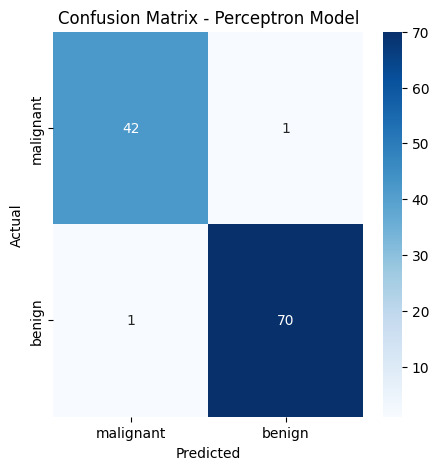

In [102]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred5))
print("Classification Report:")
print(classification_report(y_test, y_pred5))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred5)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Perceptron Model")
plt.show()

### Exercise 3 - Compare different solvers

In [103]:
# Initialize and train the MLP model
mlp6 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=0.0001, solver='sgd', random_state=42, verbose=True)
mlp6.fit(X_train, y_train)

# Make predictions
y_pred6 = mlp6.predict(X_test)

Iteration 1, loss = 0.82302849
Iteration 2, loss = 0.81522977
Iteration 3, loss = 0.80312200
Iteration 4, loss = 0.78803788
Iteration 5, loss = 0.77087687
Iteration 6, loss = 0.75306271
Iteration 7, loss = 0.73483943
Iteration 8, loss = 0.71622982
Iteration 9, loss = 0.69821593
Iteration 10, loss = 0.68071186
Iteration 11, loss = 0.66375407
Iteration 12, loss = 0.64742962
Iteration 13, loss = 0.63204132
Iteration 14, loss = 0.61730006
Iteration 15, loss = 0.60321548
Iteration 16, loss = 0.58999090
Iteration 17, loss = 0.57714128
Iteration 18, loss = 0.56480184
Iteration 19, loss = 0.55327422
Iteration 20, loss = 0.54208485
Iteration 21, loss = 0.53148408
Iteration 22, loss = 0.52123119
Iteration 23, loss = 0.51151448
Iteration 24, loss = 0.50239866
Iteration 25, loss = 0.49350734
Iteration 26, loss = 0.48498937
Iteration 27, loss = 0.47700670
Iteration 28, loss = 0.46905173
Iteration 29, loss = 0.46153857
Iteration 30, loss = 0.45420882
Iteration 31, loss = 0.44727191
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:


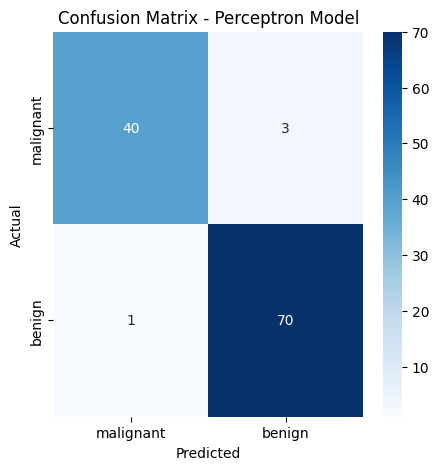

In [104]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred6))
print("Classification Report:")
print(classification_report(y_test, y_pred6))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred6)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Perceptron Model")
plt.show()

In [105]:
# Initialize and train the MLP model
mlp7 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=0.0001, solver='lbfgs', random_state=42, verbose=True)
mlp7.fit(X_train, y_train)

# Make predictions
y_pred7 = mlp7.predict(X_test)

Accuracy: 0.9122807017543859
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.96      0.90      0.93        71

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

Confusion Matrix:


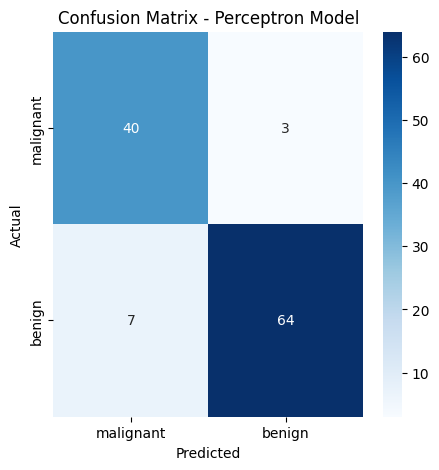

In [106]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred7))
print("Classification Report:")
print(classification_report(y_test, y_pred7))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred7)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Perceptron Model")
plt.show()